In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [2]:
df = pd.read_csv(r"C:\Users\HP\Documents\PROJECT [DA]\Zomato\Indian-Resturants.csv")

In [3]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [4]:
df.shape

(211944, 26)

In [5]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [7]:
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [8]:
df.drop(columns = ["zipcode","url","currency","takeaway","photo_count","res_id",'address'],axis = 1, inplace = True )

In [9]:
df['cuisines'].fillna('Unknown Cuisine', inplace=True)
df['timings'] = df['timings'].fillna('Unknown Timings')
df['opentable_support'] = df['opentable_support'].fillna(0)

C:\Users\HP\AppData\Local\Temp\ipykernel_8752\1885678749.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cuisines'].fillna('Unknown Cuisine', inplace=True)


In [10]:
lower = df['timings'].str.lower()
condition_1 = lower.str.contains('pm', na = False) & lower.str.contains('am', na = False)
condition_2 = lower.str.contains('am', na = False) & lower.str.contains('pm', na = False)
df['timings'] = 'Morning to Night'
df.loc[condition_2, 'timings'] = 'Morning till Noon'
df.loc[condition_1, 'timings'] = 'Noon to Night'

In [11]:
df["country_id"] = "India"

In [12]:
df['cuisines'] = df['cuisines'].str.split(',').str[0]

In [13]:
df['highlights'] = df['highlights'].str.split(',').str[1]

In [14]:
df["rating_text"].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor',
       'Dobré', 'Baik', 'Sangat Baik', 'Excelente', 'Bardzo dobrze',
       'Wybitnie', 'Ottimo', 'Muito Bom', 'Velmi dobré', 'Skvělá volba',
       'Muy Bueno', 'Bom', 'İyi', 'Çok iyi', 'Harika', 'Terbaik',
       'Skvělé', 'Průměr', 'Ortalama', 'Bueno', 'Eccellente', 'Muito bom',
       'Dobrze', 'Buono', 'Média', 'Scarso', 'Promedio', 'Veľmi dobré',
       'Vynikajúce', 'Średnio', 'Priemer', 'Biasa', 'Media'], dtype=object)

In [15]:
df['rating_text'] = df['rating_text'].replace({
    'Very Good': 'Very Good', 'Excellent': 'Excellent', 'Good': 'Good', 'Average': 'Average',
    'Not rated': 'Not rated', 'Poor': 'Poor',
    'Dobrē': 'Good', 'Wybitnie': 'Excellent','Excelente':"Excellent",'Eccellente':"Excellent",'Sangat Baik': 'Excellent', 'Ottimo': 'Excellent','Bardzo dobrze': 'Excellent','Muito Bom': 'Very Good', 'Velmi dobré': 'Very Good','Baik': 'Very Good',
    'Skvělá volba': 'Excellent', 'Bom': 'Good', 'İyi': 'Good','Bueno': 'Good', 'Çok iyi': 'Very Good','Priemer': 'Good','Biasa': 'Good','Buono': 'Very Good',"Veľmi dobré":"Very Good",
    'Harika':'Excellent', 'Terbaik': 'Excellent', 'Skvělé': 'Excellent', 'Průměr': 'Average',
    'Muito bom': 'Very Good', 'Dobrze': 'Good',"Dobré":"Good",'Média': 'Average','Media': 'Average',
    'Velmí dobré': 'Very Good', 'Vynikajúce': 'Excellent', 'Średnio': 'Average', "nan":'Not rated',"Nan":"Not Rated",'Scarso': 'Poor','Promedio': 'Average','Muy Bueno': 'Very Good','Ortalama': 'Good'})

In [16]:
df['cuisines'] = df['cuisines'].fillna('Unknown')
df['highlights'] = df['highlights'].fillna('Unknown')

In [17]:
df["rating_text"].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [18]:
df.isnull().sum()

name                    0
establishment           0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
opentable_support       0
delivery                0
dtype: int64

In [19]:
df.describe()

,city_id,latitude,longitude,average_cost_for_two,price_range,aggregate_rating,votes,opentable_support,delivery
count,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211944.0,211944.000000
mean,4746.785434,21.499758,77.615276,595.812229,1.882535,3.395937,378.001864,0.0,-0.255907
std,5568.766386,22.781331,7.500104,606.239363,0.892989,1.283642,925.333370,0.0,0.964172
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-18.000000,0.0,-1.000000
25%,11.000000,15.496071,74.877961,250.000000,1.000000,3.300000,16.000000,0.0,-1.000000
50%,34.000000,22.514494,77.425971,400.000000,2.000000,3.800000,100.000000,0.0,-1.000000
75%,11306.000000,26.841667,80.219323,700.000000,2.000000,4.100000,362.000000,0.0,1.000000
max,11354.000000,10000.000000,91.832769,30000.000000,4.000000,4.900000,42539.000000,0.0,1.000000


# Basic Statistics :

In [20]:
rating = {"Excellent": 5,"Very Good": 4,"Good": 3,"Average": 2,"Poor": 1,"Not rated": None}
df['rating_numeric'] = df['rating_text'].map(rating)

In [21]:
df['rating_numeric']

0         4.0
1         4.0
2         4.0
3         4.0
4         5.0
         ... 
211939    4.0
211940    4.0
211941    4.0
211942    3.0
211943    4.0
Name: rating_numeric, Length: 211944, dtype: float64

In [22]:
mean_rating = df['rating_numeric'].mean()
median_rating = df['rating_numeric'].median()
min_rating = df['rating_numeric'].min()
max_rating = df['rating_numeric'].max()
std_rating = df['rating_numeric'].std()
print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Minimum Rating:", min_rating)
print("Maximum Rating:", max_rating)
print("Standard Deviation:", std_rating)

Mean Rating: 3.2816210881538312
Median Rating: 3.0
Minimum Rating: 1.0
Maximum Rating: 5.0
Standard Deviation: 0.9256918577272559


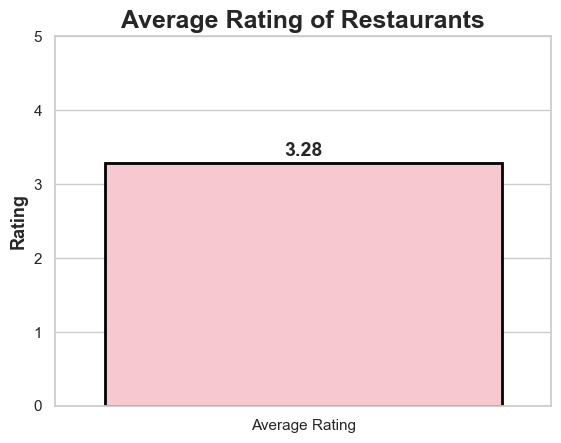

In [23]:
sns.set(style = "whitegrid")
sns.barplot(x = ["Average Rating"], y = [mean_rating], edgecolor = 'black', linewidth = 2,color = "Pink")
plt.title("Average Rating of Restaurants", fontsize = 18, fontweight ='bold')
plt.ylabel("Rating", fontsize = 13 , fontweight='bold')
plt.text(0, mean_rating + 0.1, f"{mean_rating:.2f}", ha ='center', fontsize = 14, fontweight = 'bold')
plt.ylim(0,5)
plt.show()

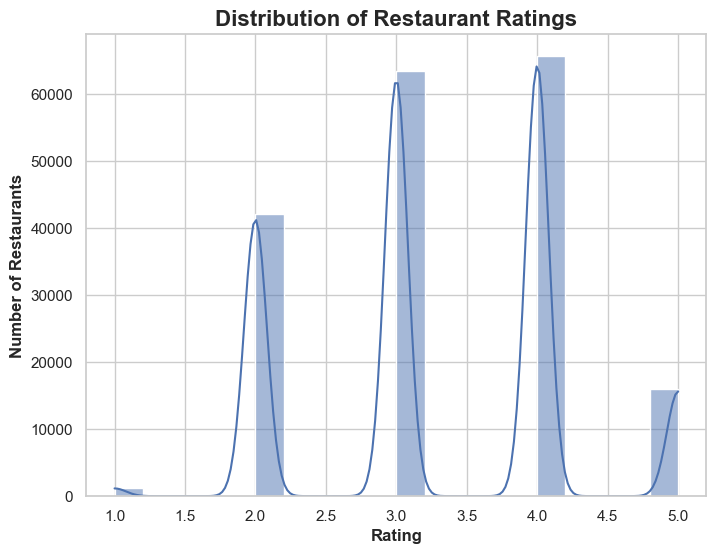

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(df["rating_numeric"], bins=20, kde=True)
plt.title("Distribution of Restaurant Ratings", fontsize=16, fontweight="bold")
plt.xlabel("Rating", fontsize=12, fontweight="bold")
plt.ylabel("Number of Restaurants", fontsize=12, fontweight="bold")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8752\3458363457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='rating_text', data = df, palette = "bright")


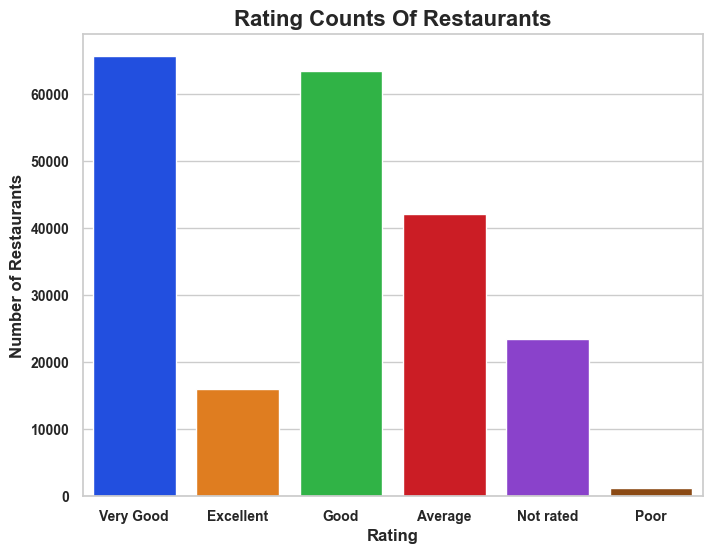

In [25]:
plt.figure(figsize = (8,6))
sns.countplot(x ='rating_text', data = df, palette = "bright")
plt.title("Rating Counts Of Restaurants", fontsize = 16, fontweight = 'bold')
plt.xlabel("Rating", fontsize = 12, fontweight = 'bold')
plt.ylabel("Number of Restaurants",fontsize = 12, fontweight = 'bold')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.show()

In [26]:
df["city"].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

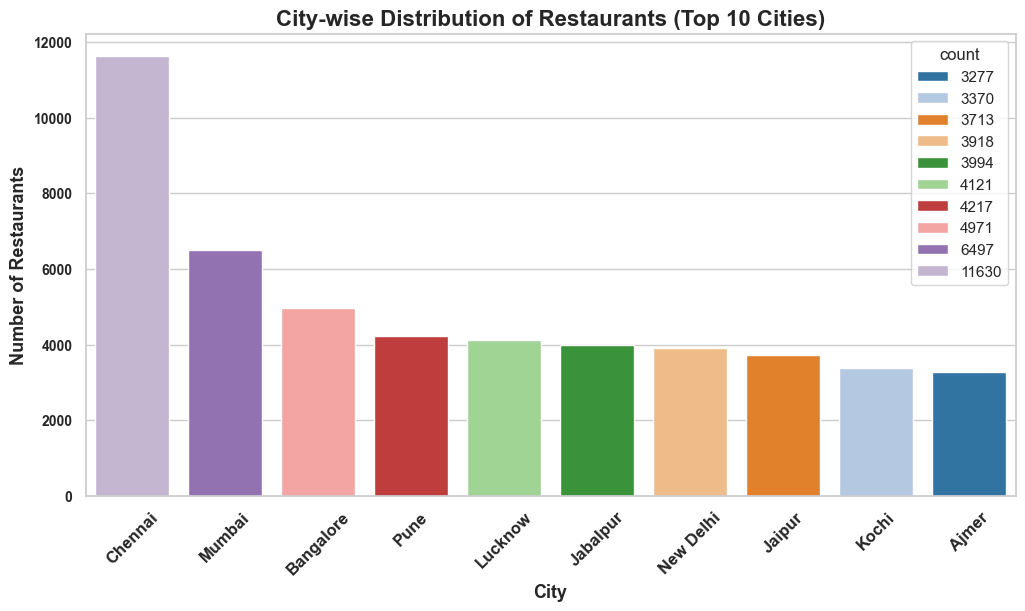

In [27]:
top_city = df['city'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_city.index, y = top_city.values, hue = top_city, palette = "tab20")
plt.title("City-wise Distribution of Restaurants (Top 10 Cities)", fontsize = 16, fontweight = 'bold')
plt.xlabel("City", fontsize = 13, fontweight = 'bold')
plt.ylabel("Number of Restaurants", fontsize = 13, fontweight = 'bold')
plt.xticks(rotation = 45, fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8752\1939915727.py:2: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(df_city,lat="latitude",lon="longitude",size="restaurant_count",color="restaurant_count",hover_name="city",hover_data=["restaurant_count"],zoom=4,height=700,mapbox_style="carto-positron")


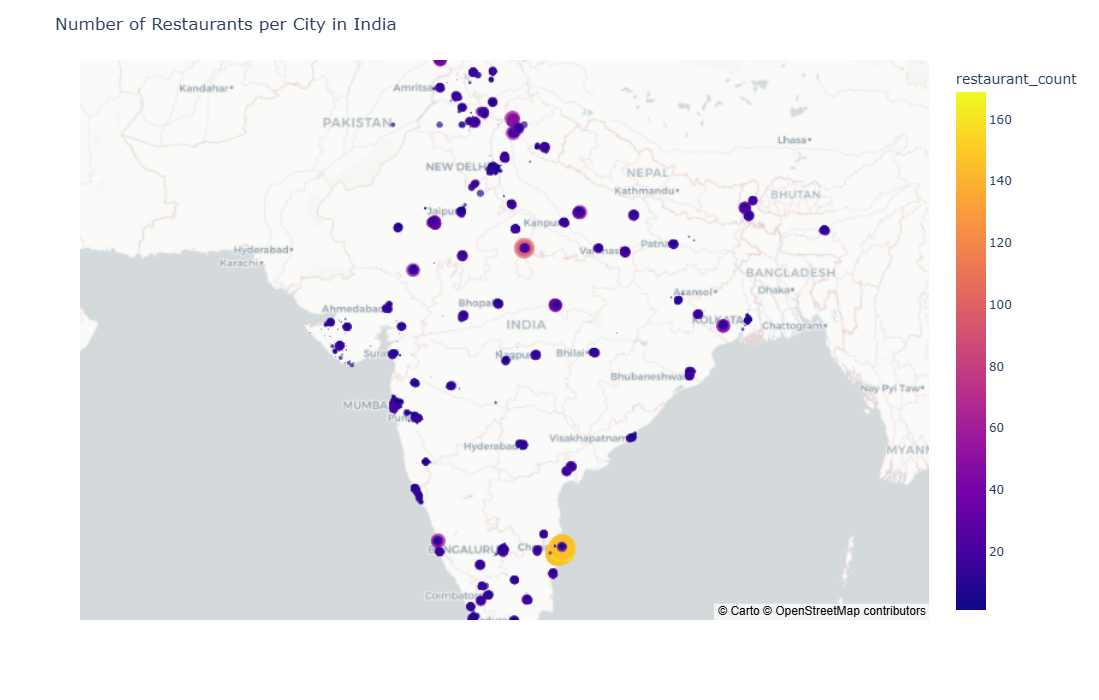

In [28]:
df_city = df.groupby(['city', 'latitude', 'longitude']).size().reset_index(name='restaurant_count')
fig = px.scatter_mapbox(df_city,lat="latitude",lon="longitude",size="restaurant_count",color="restaurant_count",hover_name="city",hover_data=["restaurant_count"],zoom=4,height=700,mapbox_style="carto-positron")
fig.update_layout(title='Number of Restaurants per City in India')
fig.show()

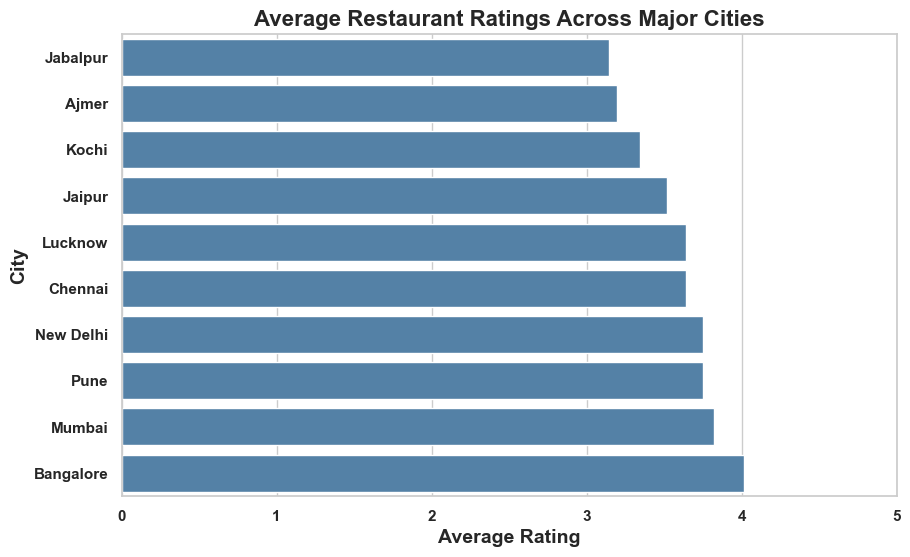

In [29]:
top_cities = df["city"].value_counts().head(10).index
city_avg_rating = (df[df["city"].isin(top_cities)].groupby("city")["rating_numeric"].mean().sort_values())
plt.figure(figsize = (10,6))
sns.barplot(x = city_avg_rating.values,y = city_avg_rating.index, color = "steelblue")
plt.title("Average Restaurant Ratings Across Major Cities", fontsize = 16, fontweight = "bold")
plt.xlabel("Average Rating", fontsize = 14, fontweight = "bold")
plt.ylabel("City", fontsize = 14, fontweight = "bold")
plt.xticks( fontsize = 11, fontweight = "bold")
plt.yticks( fontsize = 11, fontweight = "bold")
plt.xlim(0,5)
plt.show()

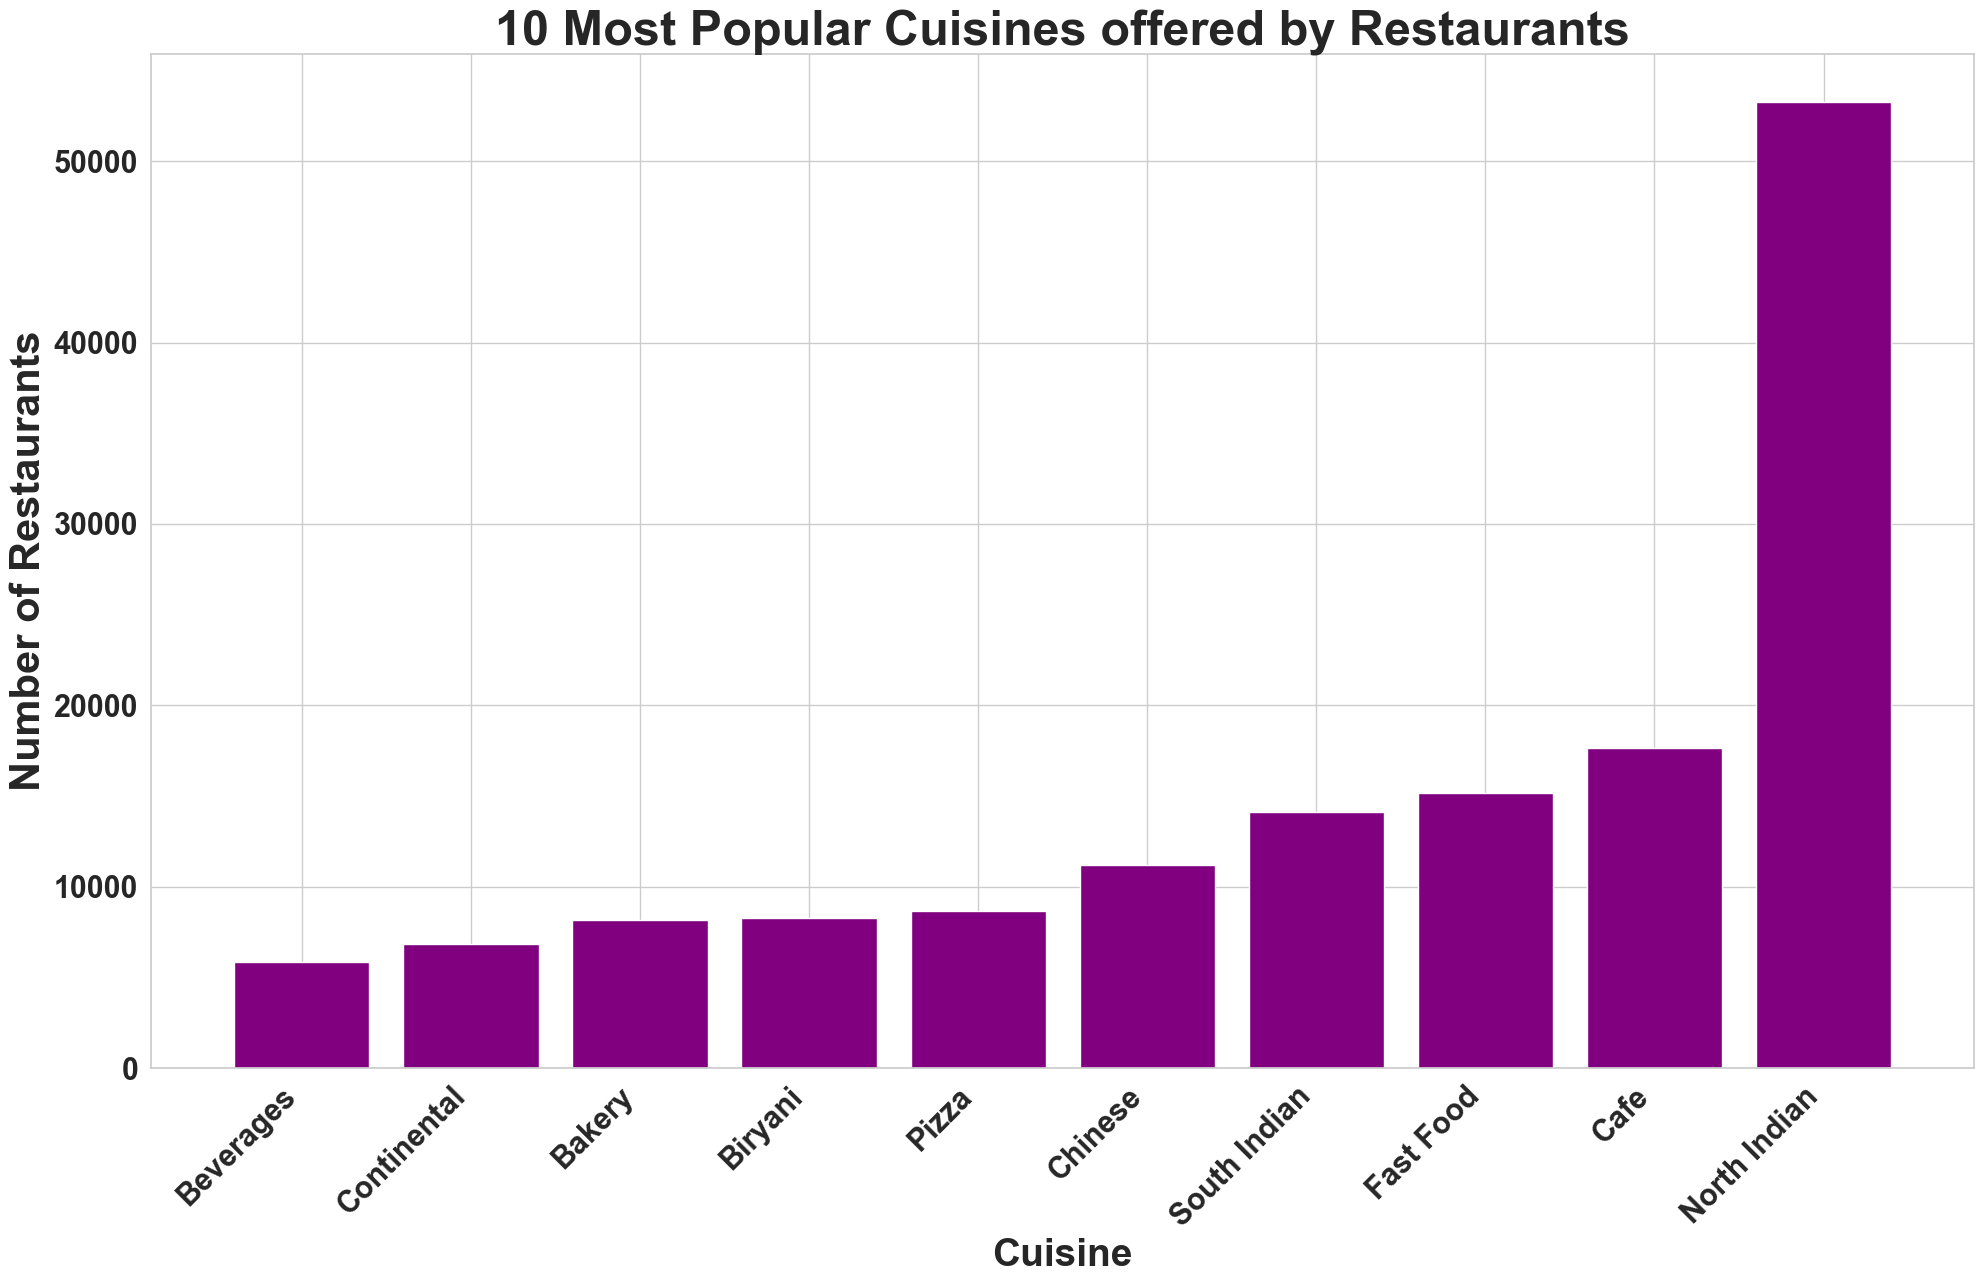

In [30]:
cuisine50 = df['cuisines'].value_counts().head(10)
top_cuisine = cuisine50.index.tolist()
df_top2 = df[df['cuisines'].isin(top_cuisine)]
df_city_counts = df_top2.groupby('cuisines')['name'].count().reset_index(name='restaurant_count')
df_city_counts = df_city_counts.sort_values('restaurant_count', ascending = True)
plt.figure(figsize = (20,13))
plt.bar(df_city_counts['cuisines'], df_city_counts['restaurant_count'], color = 'purple')
plt.xlabel('Cuisine',fontsize = 28, fontweight = 'bold')
plt.ylabel('Number of Restaurants',fontsize = 30, fontweight = 'bold')
plt.title('10 Most Popular Cuisines offered by Restaurants',fontsize = 35, fontweight = 'bold')
plt.xticks(rotation=45, ha = 'right',fontsize = 22, fontweight = 'bold')
plt.yticks(fontsize = 22, fontweight = 'bold')
plt.tight_layout()
plt.show()

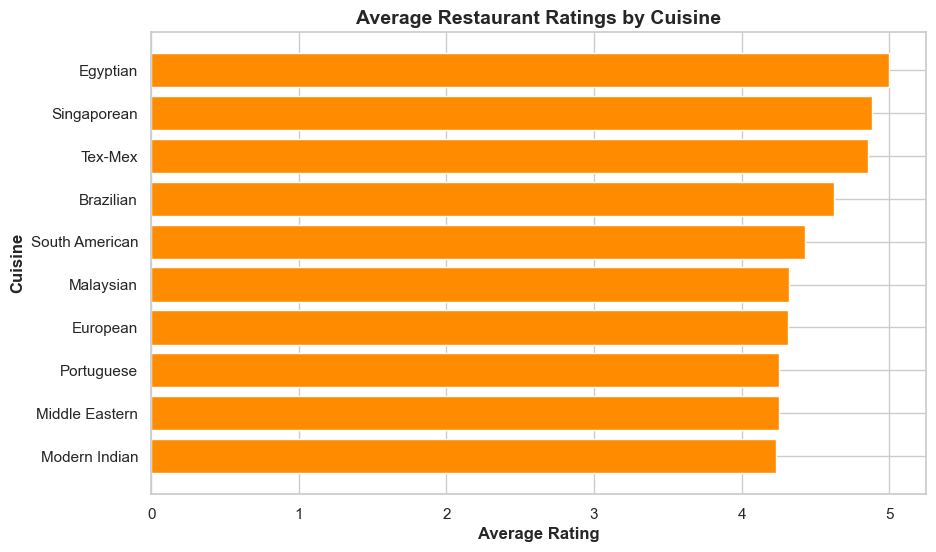

In [31]:
avg_rating_cuisine = (df.groupby("cuisines")["rating_numeric"].mean().sort_values(ascending=False).head(10))
plt.figure(figsize=(10, 6))
plt.barh(avg_rating_cuisine.index, avg_rating_cuisine.values,color = 'darkorange')
plt.xlabel("Average Rating", fontsize=12, fontweight="bold")
plt.ylabel("Cuisine", fontsize=12, fontweight="bold")
plt.title("Average Restaurant Ratings by Cuisine", fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()
plt.show()

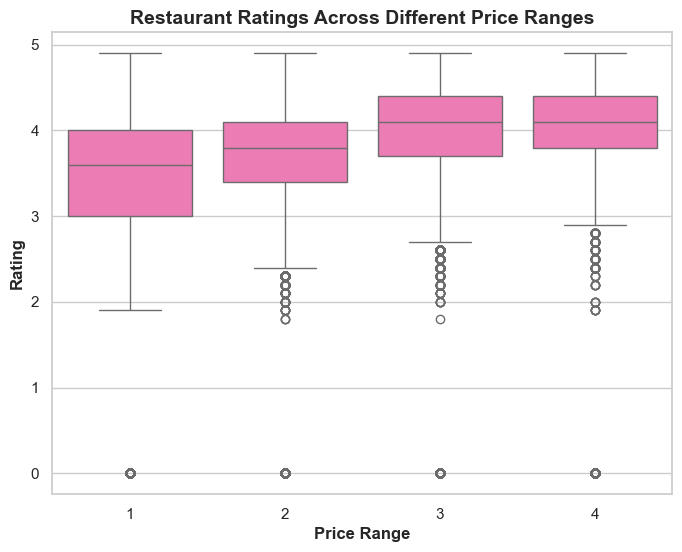

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="price_range", y="aggregate_rating", data=df , color = 'hotpink')
plt.xlabel("Price Range", fontsize=12, fontweight="bold")
plt.ylabel("Rating", fontsize=12, fontweight="bold")
plt.title("Restaurant Ratings Across Different Price Ranges", fontsize=14, fontweight="bold")
plt.show()

In [33]:
df["Online_Available"] = np.where(df["delivery"] == -1, "Not Available", "Available")

In [34]:
df["delivery"].replace(-1,0,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8752\2333395650.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





C:\Users\HP\AppData\Local\Temp\ipykernel_8752\1664530838.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




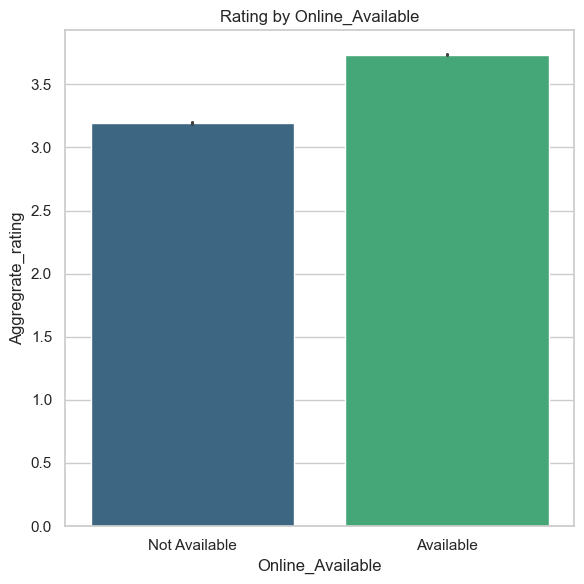

In [35]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, x='Online_Available',y='aggregate_rating', palette='viridis')
plt.xlabel('Online_Available')
plt.ylabel('Aggregrate_rating')
plt.title('Rating by Online_Available')
plt.tight_layout()
plt.show()

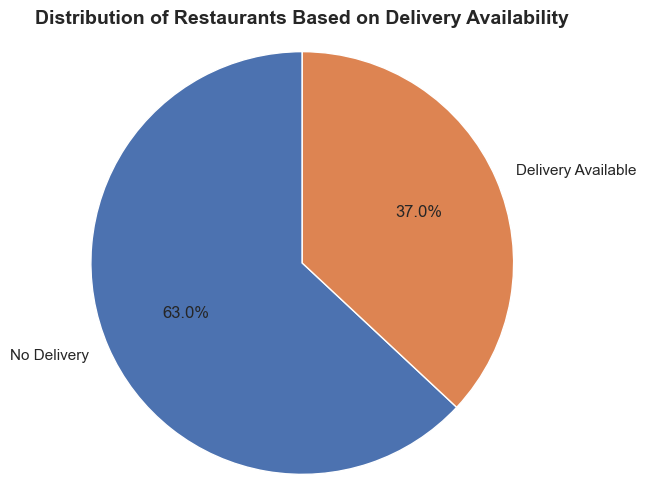

In [36]:
delivery_map = {0: "No Delivery", 1: "Delivery Available"}
delivery_counts = df['delivery'].map(delivery_map).value_counts()
plt.figure(figsize=(6,6))
plt.pie(delivery_counts.values,labels=delivery_counts.index,autopct='%1.1f%%',startangle=90)
plt.title("Distribution of Restaurants Based on Delivery Availability", fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

In [37]:
df_counts = (df['name'].value_counts().head(20).reset_index())
df_counts.columns = ['name', 'count']
df_counts

,name,count
0,Domino's Pizza,3108
1,KFC,1343
2,Cafe Coffee Day,1068
3,Pizza Hut,936
4,Subway,766
5,Barbeque Nation,725
6,Burger King,658
7,McDonald's,578
8,Keventers,512
9,The Chocolate Room,461


C:\Users\HP\AppData\Local\Temp\ipykernel_8752\2222373157.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




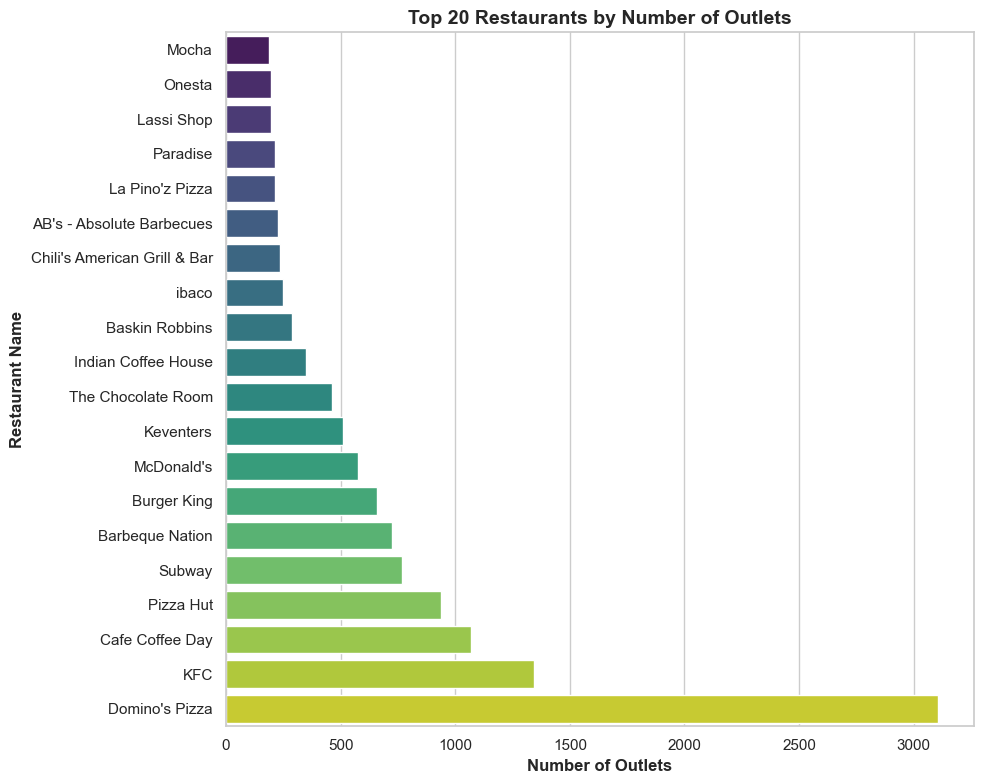

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(data = df_counts.sort_values('count', ascending=True),y='name',x='count',palette='viridis')
plt.xlabel('Number of Outlets',fontsize=12, fontweight="bold")
plt.ylabel('Restaurant Name',fontsize=12, fontweight="bold")
plt.title('Top 20 Restaurants by Number of Outlets', fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [39]:
df_counts = df['name'].value_counts(ascending=False).head(20)
top_restaurant_names = df_counts.index.tolist()
top_restaurant_names

["Domino's Pizza",
 'KFC',
 'Cafe Coffee Day',
 'Pizza Hut',
 'Subway',
 'Barbeque Nation',
 'Burger King',
 "McDonald's",
 'Keventers',
 'The Chocolate Room',
 'Indian Coffee House',
 'Baskin Robbins',
 'ibaco',
 "Chili's American Grill & Bar",
 "AB's - Absolute Barbecues",
 'Paradise',
 "La Pino'z Pizza",
 'Lassi Shop',
 'Onesta',
 'Mocha']

In [40]:
avg_ratings = df[df['name'].isin(top_restaurant_names)].groupby('name')['aggregate_rating'].mean()
avg_ratings = avg_ratings[top_restaurant_names]
avg_ratings

name
Domino's Pizza                  3.716216
KFC                             3.913924
Cafe Coffee Day                 2.904963
Pizza Hut                       3.726389
Subway                          3.742950
Barbeque Nation                 4.472966
Burger King                     3.964438
McDonald's                      3.912457
Keventers                       3.809570
The Chocolate Room              3.825380
Indian Coffee House             3.271633
Baskin Robbins                  2.990909
ibaco                           3.658233
Chili's American Grill & Bar    4.756410
AB's - Absolute Barbecues       4.805333
Paradise                        4.116355
La Pino'z Pizza                 4.038785
Lassi Shop                      3.443367
Onesta                          4.529744
Mocha                           4.531016
Name: aggregate_rating, dtype: float64

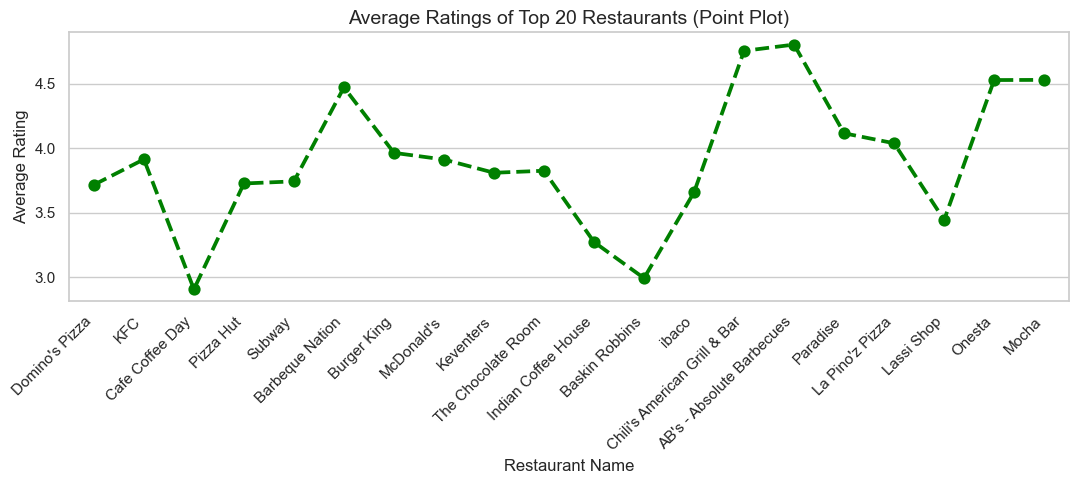

In [41]:
plt.figure(figsize=(11,5))
sns.pointplot(x=top_restaurant_names,y=avg_ratings.values,color='green',markers='o',linestyles='--')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Top 20 Restaurants (Point Plot)', fontsize=14)
plt.tight_layout()
plt.show()

In [42]:
df_avg = df.groupby("name")["aggregate_rating"].mean().reset_index()
df_avg = df_avg.sort_values(by="aggregate_rating", ascending=False)
df_avg

,name,aggregate_rating
40184,White Charcoal - The Empresa Hotel,4.9
36864,The Great Bear,4.9
22761,Milap's Punjabi Hotel,4.9
17665,Joshi Dahi Bada House,4.9
22569,Meraki The Coffee House,4.9
...,...,...
41070,solitaire the food court,0.0
41071,street treat,0.0
41074,tempteys,0.0
41075,test,0.0


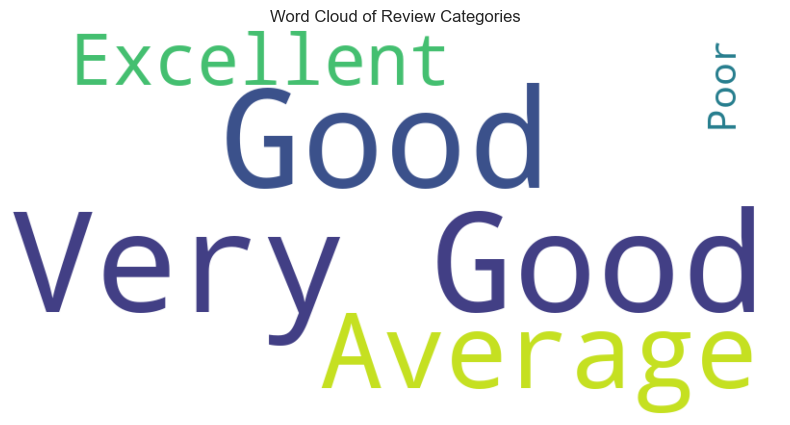

In [45]:
categories = ["Excellent", "Very Good", "Good", "Average", "Poor", "Not Rated"]
review_counts = df['rating_text'].value_counts()
review_counts = review_counts.reindex(categories, fill_value=0)
word_freq = dict(review_counts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Review Categories")
plt.show()

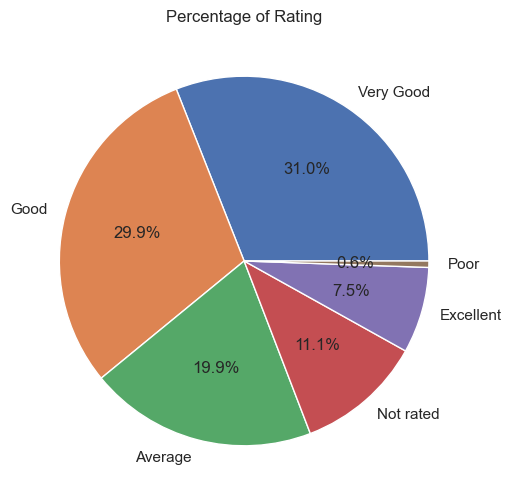

In [46]:
counts = df['rating_text'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Percentage of Rating')
plt.show()